<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Данные-просто-нужно-загрузить,-применить-shape/info/head." data-toc-modified-id="Данные-просто-нужно-загрузить,-применить-shape/info/head.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Данные просто нужно загрузить, применить shape/info/head.</a></span></li><li><span><a href="#Проверим,-что-эффективность-обогащения-рассчитана-правильно." data-toc-modified-id="Проверим,-что-эффективность-обогащения-рассчитана-правильно.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверим, что эффективность обогащения рассчитана правильно.</a></span></li><li><span><a href="#Признаки,-недоступные-в-тестовой-выборке." data-toc-modified-id="Признаки,-недоступные-в-тестовой-выборке.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Признаки, недоступные в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#преобразую-столбец-в-формат-datetime" data-toc-modified-id="преобразую-столбец-в-формат-datetime-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>преобразую столбец в формат datetime</a></span></li><li><span><a href="#Заполним-пропуски" data-toc-modified-id="Заполним-пропуски-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Заполним пропуски</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Размеры-гранул-сырья-в-выборках." data-toc-modified-id="Размеры-гранул-сырья-в-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Размеры гранул сырья в выборках.</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#функция-для-вычисления-итоговой-sMAPE." data-toc-modified-id="функция-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>функция для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Модели-и-их-качество-на-кросс-валидации." data-toc-modified-id="Модели-и-их-качество-на-кросс-валидации.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модели и их качество на кросс-валидации.</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4">

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import make_scorer

### Данные просто нужно загрузить, применить shape/info/head.

In [175]:
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv'); data_full.name='data_full'
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv'); data_full.name='data_train'
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv'); data_full.name='data_test'

data_list = [data_full, data_train, data_test]

In [176]:
for data in data_list:
    print('==================================')
    # print('df name:', data.name)
    display(data.shape)
    # display(data.info())
    display(data.head())

(19439, 87)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


(14149, 87)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


(5290, 53)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Full разделена на train и test, но в test попали не все признаки.

###  Проверим, что эффективность обогащения рассчитана правильно. 

Вычислим её на обучающей выборке для признака rougher.output.recovery.



In [177]:
# формулу расчета эффективности обогащения вынесу в функцию

def recovery(F, C, T):
    return ((C * (F - T)) / (F * (C - T))) * 100

In [ ]:
# отберем для расчета требуемые столбцы и передадим их в функцию

data_train['estimated_recovery'] = recovery(data_train['rougher.input.feed_au'], 
                                            data_train['final.output.concentrate_au'], 
                                            data_train['final.output.tail_au'])

Найдём MAE между нашими расчётами и значением признака.

In [179]:
mae = mean_absolute_error(data_train['estimated_recovery'], data_train['final.output.recovery'])
mae

8.538049763979541e-15

Разница очень мала. считаю что расчеты прведены верно.

### Признаки, недоступные в тестовой выборке. 


In [180]:
set(list(data_train.columns)) - set(list(data_test.columns)) 

{'estimated_recovery',
 'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_a

тестовой выборке отсутсвуют - параметры продукта, признаки со значениеми на выходе этапов. все признаки относятся к типу float.

### Предобработка данных

#### преобразую столбец в формат datetime 

как оказалось это в будущем не пригодитсмя, но я подумал что возможно потребуется что то делать со временем

In [181]:
# data_train['time'] = pd.to_datetime(data_train['date'], format="%Y/%m/%d %H:%M:%S")
data_train['time'] = data_train['date'].astype('datetime64')   # .dt.timestamp()
data_train['time'].head()

0   2016-01-15 00:00:00
1   2016-01-15 01:00:00
2   2016-01-15 02:00:00
3   2016-01-15 03:00:00
4   2016-01-15 04:00:00
Name: time, dtype: datetime64[ns]

In [182]:
data_train['timestamp'] = data_train['time'].values.astype(np.int64) // 10 ** 9
data_train['timestamp'].head()

0    1452816000
1    1452819600
2    1452823200
3    1452826800
4    1452830400
Name: timestamp, dtype: int64

#### Заполним пропуски

заполнить нужно обязательно в тренировочной выборке и в тестовой, ведь они и нужны для модели. 

считаю что логичнее будет заполнение средним между ближайшими значениями - так как мне кажется что значения меняются плавно с течением времени. 

In [183]:
data_test = data_test.interpolate()
data_train = data_train.interpolate()
data_full = data_full.interpolate()

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

Целью процесса яшляется увеличить концентрацию золота и умньшить количество примесей в финальном продукте (final.output.recovery).

Посмотрим среднюю концентрацию от этапа к этапу

для удобства отберу признаки в датафреймы по металлам

этапа очистки всего 4 - отберу признаки (в порядке очерёдности) со значениями концентраций металла на этих этапах и вычислю среднее

In [184]:
df_au = data_full[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
df_ag = data_full[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
df_pb = data_full[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]

In [185]:
#  напишу функцию которая строит графики на принимаемых датафреймах

def metal_conc(data,name):
    plt.figure(figsize=(12, 7))
    list_stage =['rougher feed','rougher output','primary cleaner','final output']
    
    for i in range(0,4):
        plt.hist(data.iloc[:, [i]], bins=70, alpha=0.5, label=list_stage[i])
        
    plt.title(name)
    plt.xlabel('Концентрация')
    plt.ylabel('Количество наблюдений')
    plt.legend()
    plt.show()

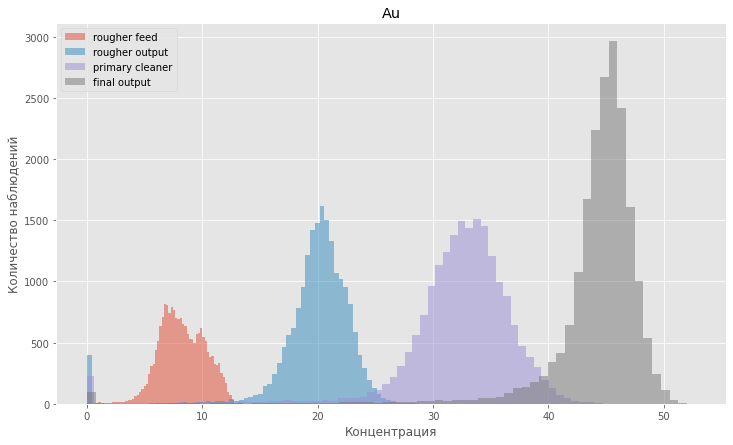

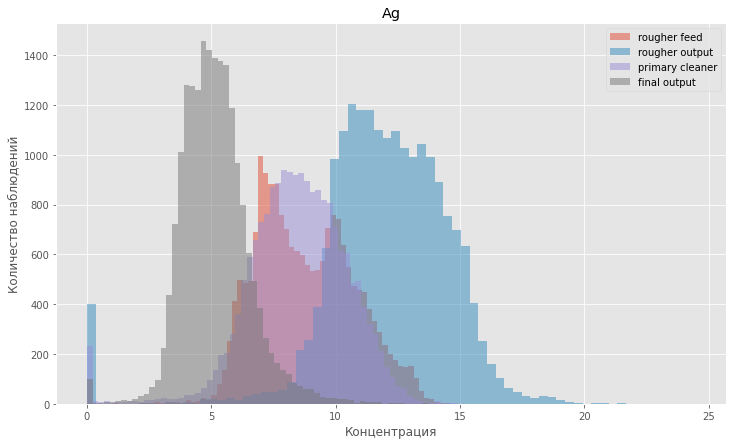

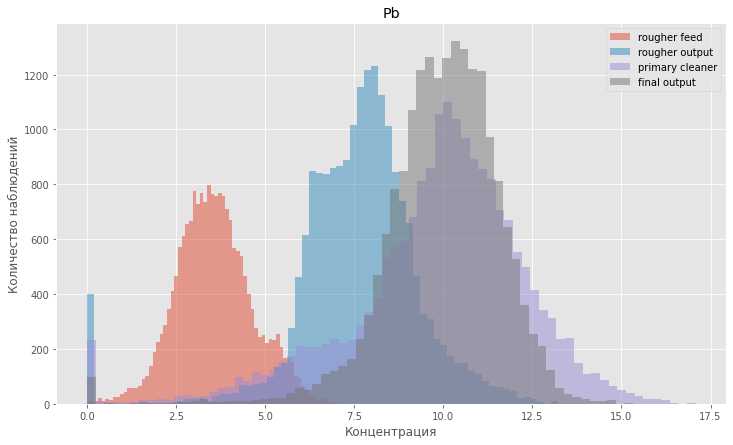

In [186]:
metal_conc(df_au, 'Au') 
metal_conc(df_ag, 'Ag') 
metal_conc(df_pb, 'Pb') 

In [187]:
median_au = df_au.median()
median_ag = df_ag.median()
median_pb = df_pb.median()

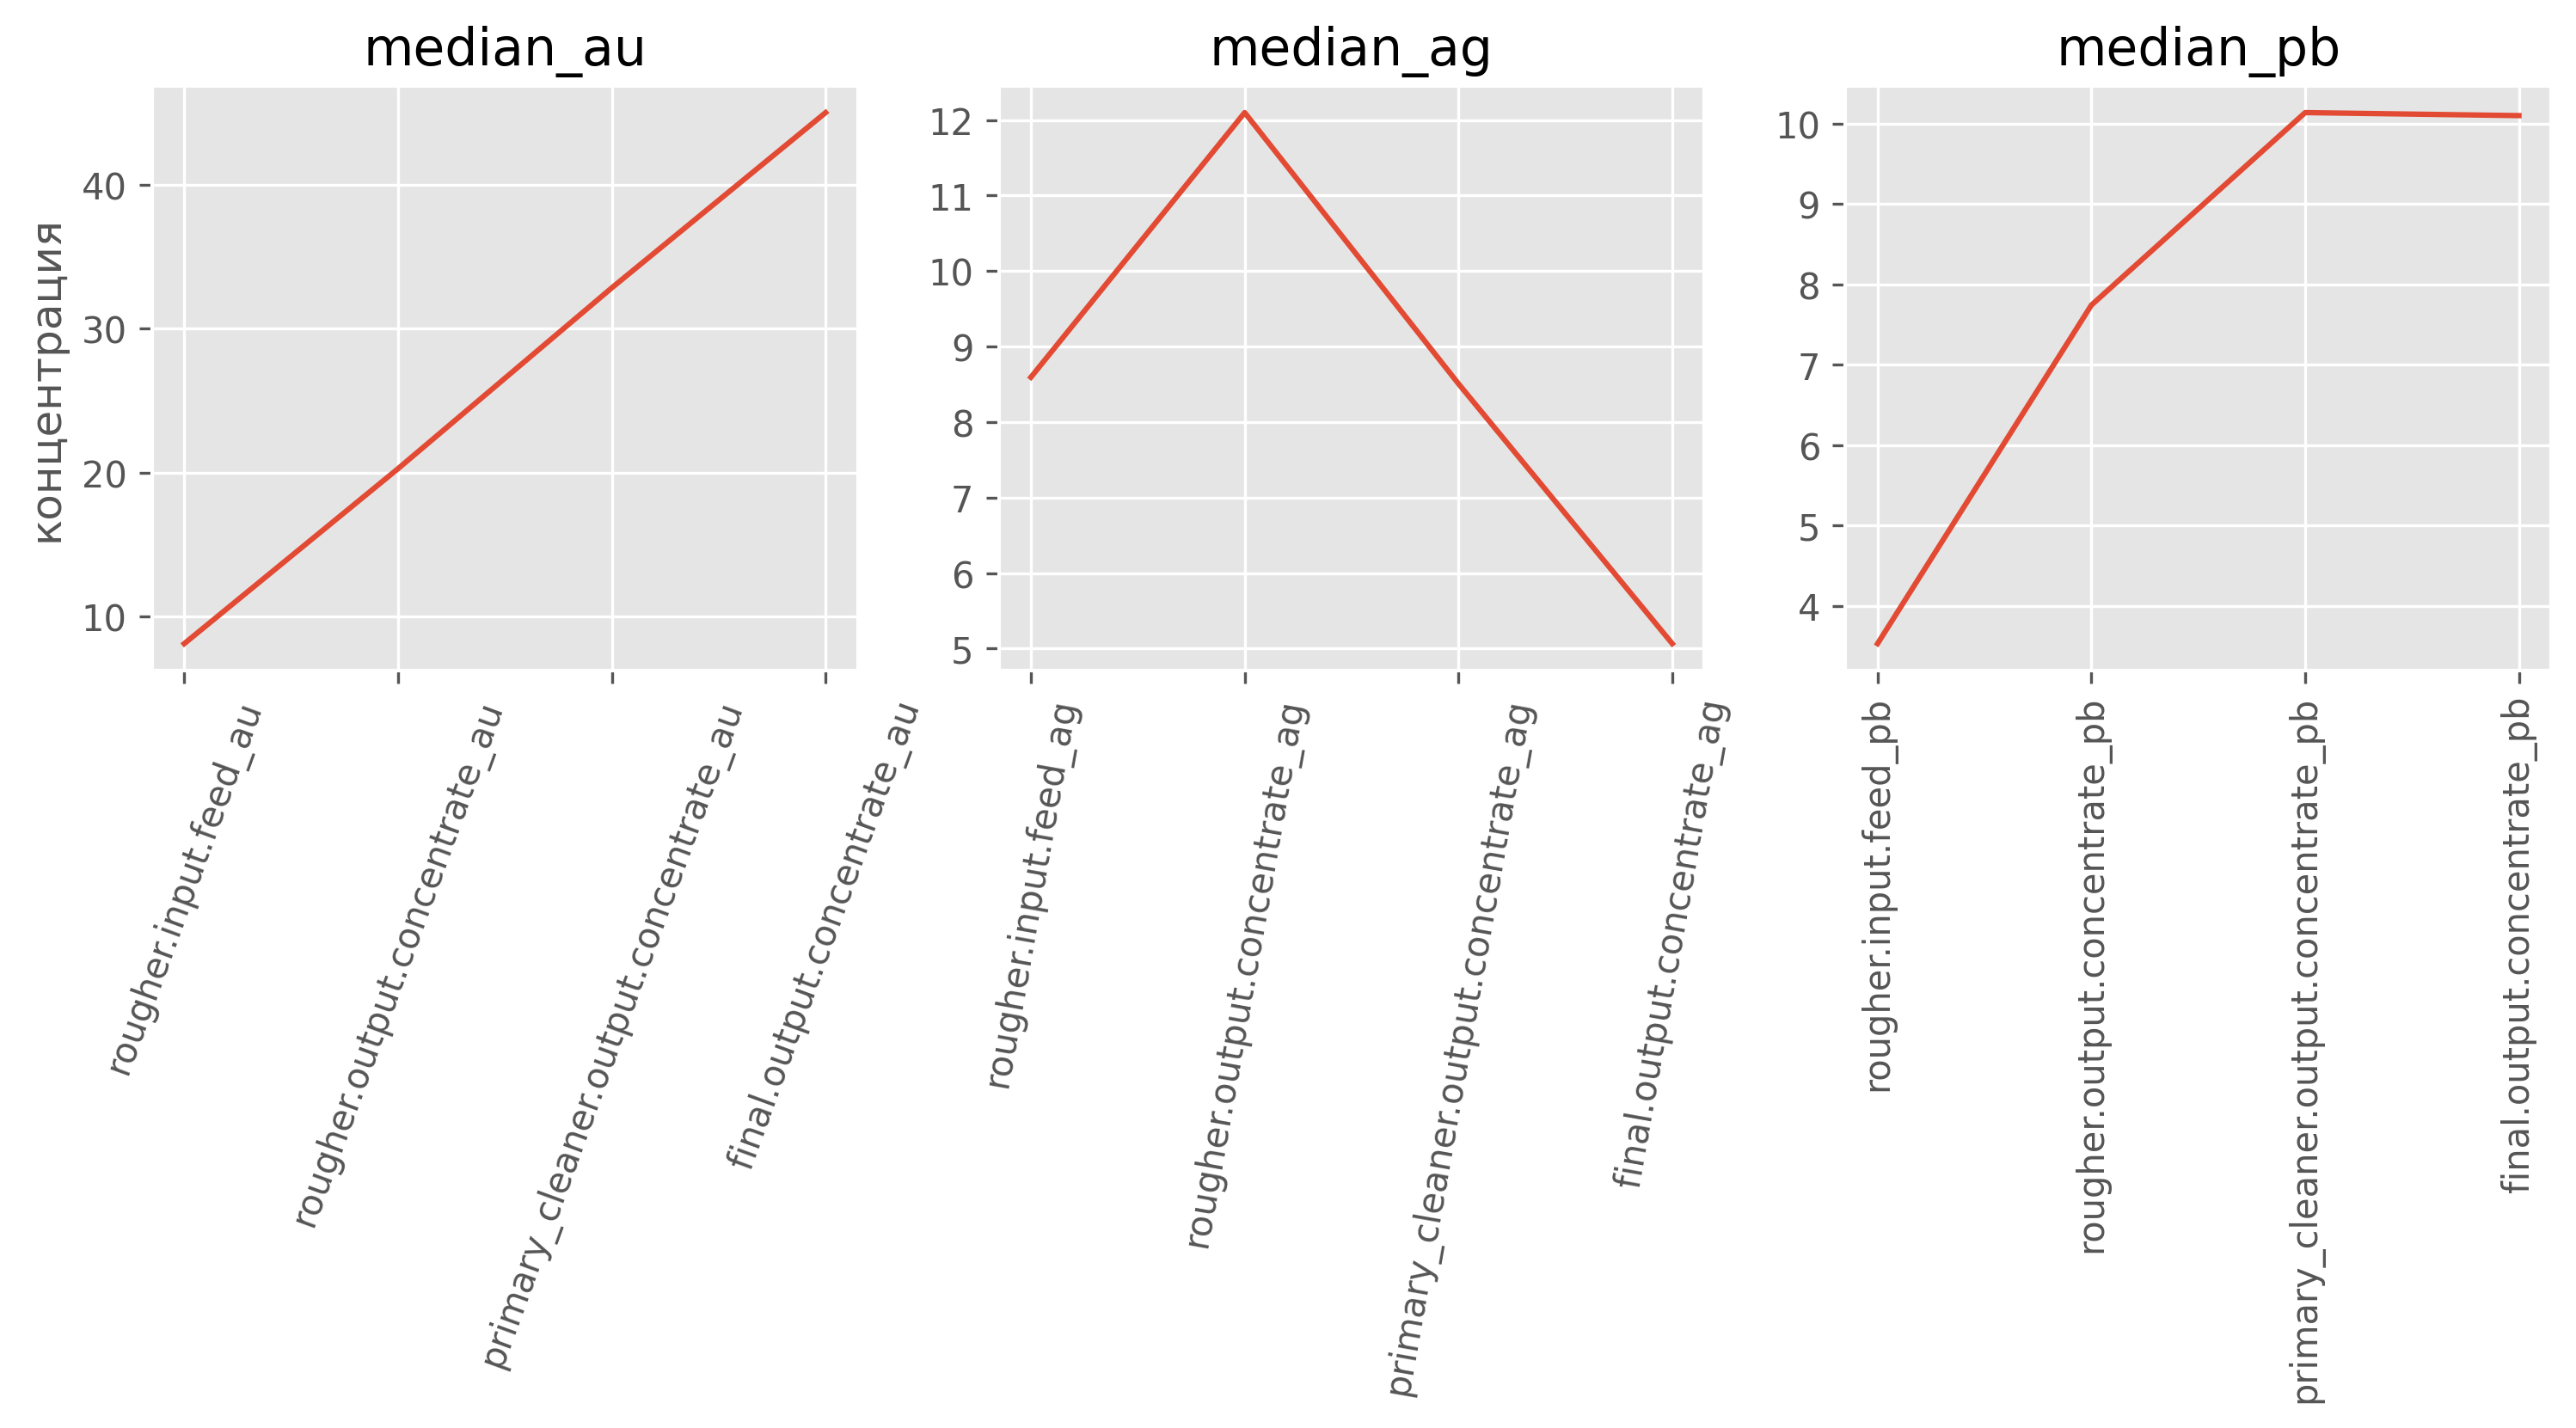

In [188]:
plt.style.use('ggplot')
plt.subplots(figsize=(12,3), dpi=300)

# одна строка, три столбца. Текущая ячейка - 1
pylab.subplot (1, 3, 1)
pylab.plot(median_au)
pylab.title ("median_au")
pylab.ylabel("концентрация")
plt.xticks(rotation=70)

# одна строка, три столбца. Текущая ячейка - 2
pylab.subplot (1, 3, 2)
pylab.plot(median_ag)  
pylab.title ("median_ag")
plt.xticks(rotation=80)

# одна строка, три столбца. Текущая ячейка - 3
pylab.subplot (1, 3, 3)
pylab.plot (median_pb)
pylab.title ("median_pb")

plt.xticks(rotation=90)
# Покажем окно с нарисованным графиком
pylab.show()

Как видим из значений концентрация золота растет от этапа к этапу очистки 

### Размеры гранул сырья в выборках.

Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [189]:
# посмотрим на описательную статистику 
display( data_train['rougher.input.feed_size'].describe(), data_test['rougher.input.feed_size'].describe())

count    14149.000000
mean        60.097903
std         23.023690
min          9.659576
25%         48.950593
50%         55.269784
75%         65.982466
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5290.000000
mean       55.952835
std        19.080372
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

<AxesSubplot:>

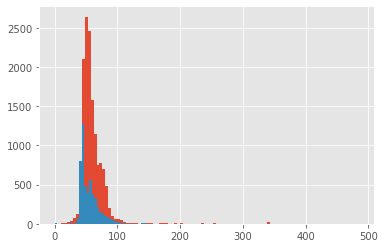

In [190]:
data_train['rougher.input.feed_size'].hist(bins=100)
data_test['rougher.input.feed_size'].hist(bins=100)

(0.0, 125.0)

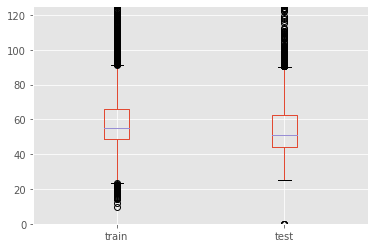

In [191]:
pd.DataFrame({'train':data_train['rougher.input.feed_size'],
              'test':data_test['rougher.input.feed_size']}).boxplot()
plt.ylim(0,125)

Координальных отличий распределений не наблюдаю

### Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [192]:
# автоматизируем именование колонок для дальнейшего отбора в дата фрей, который потом передадим на функцию отображения графиков

material_list = ['au','ag','pb','sol']

def get_name_col(stage):
    result = []
    for i,j in enumerate(material_list):
        result.append(stage+'_'+j)
    return result

df_sum = pd.DataFrame()

In [193]:
# сформируем датафреймы с отобранными признаками
df_sum['rougher.input.feed'] = data_full[get_name_col('rougher.input.feed')].sum(axis=1)
df_sum['rougher.output'] = data_full[get_name_col('rougher.output.concentrate')].sum(axis=1) 
df_sum['primary_cleaner.output'] = data_full[get_name_col('primary_cleaner.output.concentrate')].sum(axis=1) 
df_sum['final.output'] = data_full[get_name_col('final.output.concentrate')].sum(axis=1)

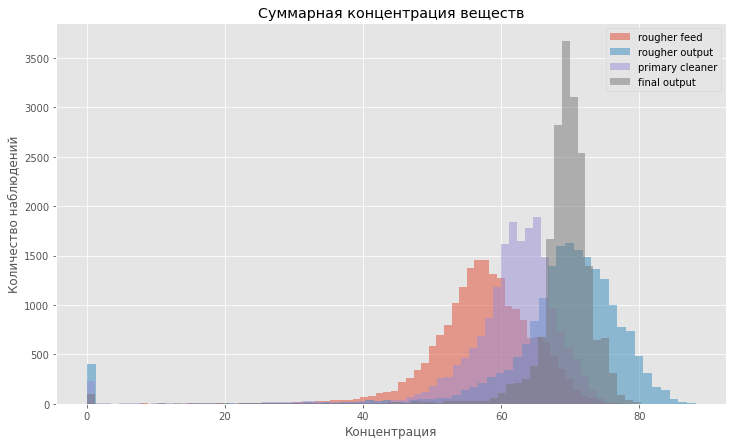

In [194]:
metal_conc(df_sum,'Суммарная концентрация веществ')

Похоже что обнаружены аномальные значения в суммарном распределении - так как не должно быть нулевых сумм веществ, это ошибка.

От них необходимо избавиться - так как модель на таких данных обучать и проверять нельзя. Как говорится -'гарбидж ин гарбидж аут'

In [195]:
# пельём колонку с датой, по которой индексируются записи
df_sum = df_sum.merge(data_full['date'], left_index=True,  right_index=True)

In [196]:
# получим индексы записей в которых есть нулевые суммы концентраций

index_for_drop = df_sum[(df_sum['rougher.input.feed'] == 0) | \
                        (df_sum['rougher.output'] == 0) | \
                        (df_sum['primary_cleaner.output'] == 0) | \
                        (df_sum['final.output'] == 0)]['date']
index_for_drop.shape

(591,)

In [197]:
# и удалим эти индексы из выборок
data_train = data_train[~data_train['date'].isin(index_for_drop)]
data_test = data_test[~data_test['date'].isin(index_for_drop)]

## Модель

### функция для вычисления итоговой sMAPE.

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

In [198]:
def smape(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = ((np.abs(y_true) + np.abs(y_pred)) / 2) 
    
    return (error / scale).mean() * 100

Итоговая метрика складывается из двух величин 

- эффективность обогащения чернового концентрата rougher.output.recovery
- эффективность обогащения финального концентрата final.output.recovery.

In [199]:
def finish_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    return 0.25 * smape(y_true_rougher, y_pred_rougher) + 0.75 * smape(y_true_final, y_pred_final)

### Модели и их качество на кросс-валидации. 

Целевой таргет для тестовой выборки берем из полной выборки

In [200]:
data_test = data_test.merge(data_full[data_full['date'].isin(data_test['date'])][['final.output.recovery','rougher.output.recovery','date']], on = 'date')

Перед тем как тренинровать модели необходимо отобрать признаки - удалить те которых нет в тестовой выборке

In [201]:
data_train = data_train[data_test.columns]

Нужно спрогнозировать сразу две величины:

 - эффективность обогащения чернового концентрата rougher.output.recovery;
 - эффективность обогащения финального концентрата final.output.recovery.
 
 отберем их в таргеты

для нашей метрики качества потребуется два предсказанных значения

In [202]:
features_train = data_train.drop(['date','final.output.recovery','rougher.output.recovery'],axis=1)
target_train_final =  data_train['final.output.recovery']
target_train_rougher =  data_train['rougher.output.recovery']

features_test = data_test.drop(['date','final.output.recovery','rougher.output.recovery'],axis=1)
target_test_final =  data_test['final.output.recovery']
target_test_rougher =  data_test['rougher.output.recovery']

In [203]:
print(features_train.shape,target_train.shape, features_test.shape  ,target_test.shape)

(13725, 52) (13725,) (5123, 52) (5123,)


### Выберем лучшую модель и проверим её на тестовой выборке.

In [204]:
# определим нашу метрику качества как scorer для моделей
smape_score = make_scorer(smape, greater_is_better=False)

In [205]:
model_lr = LinearRegression()


# попытаемся подобрать наилучшие параметры модели с помощью GridSearchCV

# parametrs = { 'n_estimators': range (50, 201, 50),
#               'max_depth': range (5,13, 2),
#               'min_samples_leaf': range (2,8,2),
#               'min_samples_split': range (2,8,2) }

# grid = GridSearchCV(model_rf, parametrs, cv=5, scoring=smape_score)
# grid.fit(features_train, target_train)
# grid.best_params_

#----   работает ооооочень долго
#----   поэтому возьму такие параметры ->

model_rf = RandomForestRegressor(n_estimators=10, max_depth=10, min_samples_leaf=2, min_samples_split=2)


Получим значение нашей метрики smape на кросс валидации

In [206]:
# Линейная регрессия на  'rougher'

scores_r = cross_val_score(model_lr, features_train, target_train_rougher, scoring = smape_score, cv = 5)
 
print(scores_r)
print(scores_r.mean())

# Линейная регрессия 'final'

scores_f = cross_val_score(model_lr, features_train, target_train_final, scoring = smape_score, cv = 5)
 
print(scores_f)
print(scores_f.mean())

[-9.54273457 -7.01431322 -5.55617536 -5.06767069 -8.95660074]
-7.227498914273005
[-13.35331676  -9.57794149  -9.26024363  -9.34058837 -13.31899031]
-10.97021611182735


In [207]:
# Случайный лес 'rougher'
scores_r = cross_val_score(model_rf, features_train, target_train_rougher, scoring = smape_score, cv = 5)
 
print(scores_r)
print(scores_r.mean())

# Случайный лес 'final'

scores_f = cross_val_score(model_rf, features_train, target_train_final, scoring = smape_score, cv = 5)
 
print(scores_f)
print(scores_f.mean())

[-8.2525744  -7.89412766 -5.11165192 -6.28715528 -9.56171607]
-7.421445066958725
[-10.0248126  -10.54140969 -10.12386038  -9.1666372  -11.65379649]
-10.302103270424109


Случайный лес лучше показал себя на метрике smape

обучим модель  и получим предсказания зхначений для итоговой метрики

In [208]:
model_rf.fit(features_train, target_train_final)
predicted_rf_final = model_rf.predict(features_test)

In [209]:
model_rf.fit(features_train, target_train_rougher)
predicted_rf_rougher = model_rf.predict(features_test)

Вычислим итоговую метрику

In [210]:
finish_smape(target_test_rougher, predicted_rf_rougher, target_test_final, predicted_rf_final)

7.113071214966471

Симметричное среднее абсолютное процентное отклонение составило около  7 процентов